In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

pd.set_option('mode.chained_assignment', None)
sn.set(rc={'figure.figsize':(9,9)})
sn.set(font_scale=1.4)

In [2]:
# Plotting functions
def make_meshgrid(x, y, h=.005):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Support Vector Machine
Supervised learning model for classification and can be used for regression. It is a *non-probabilistic binary linear classifier*. The SVM model is a representation of the examples as points in space, mapped so that the examples of the seperate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

<br>
<br>

<div>
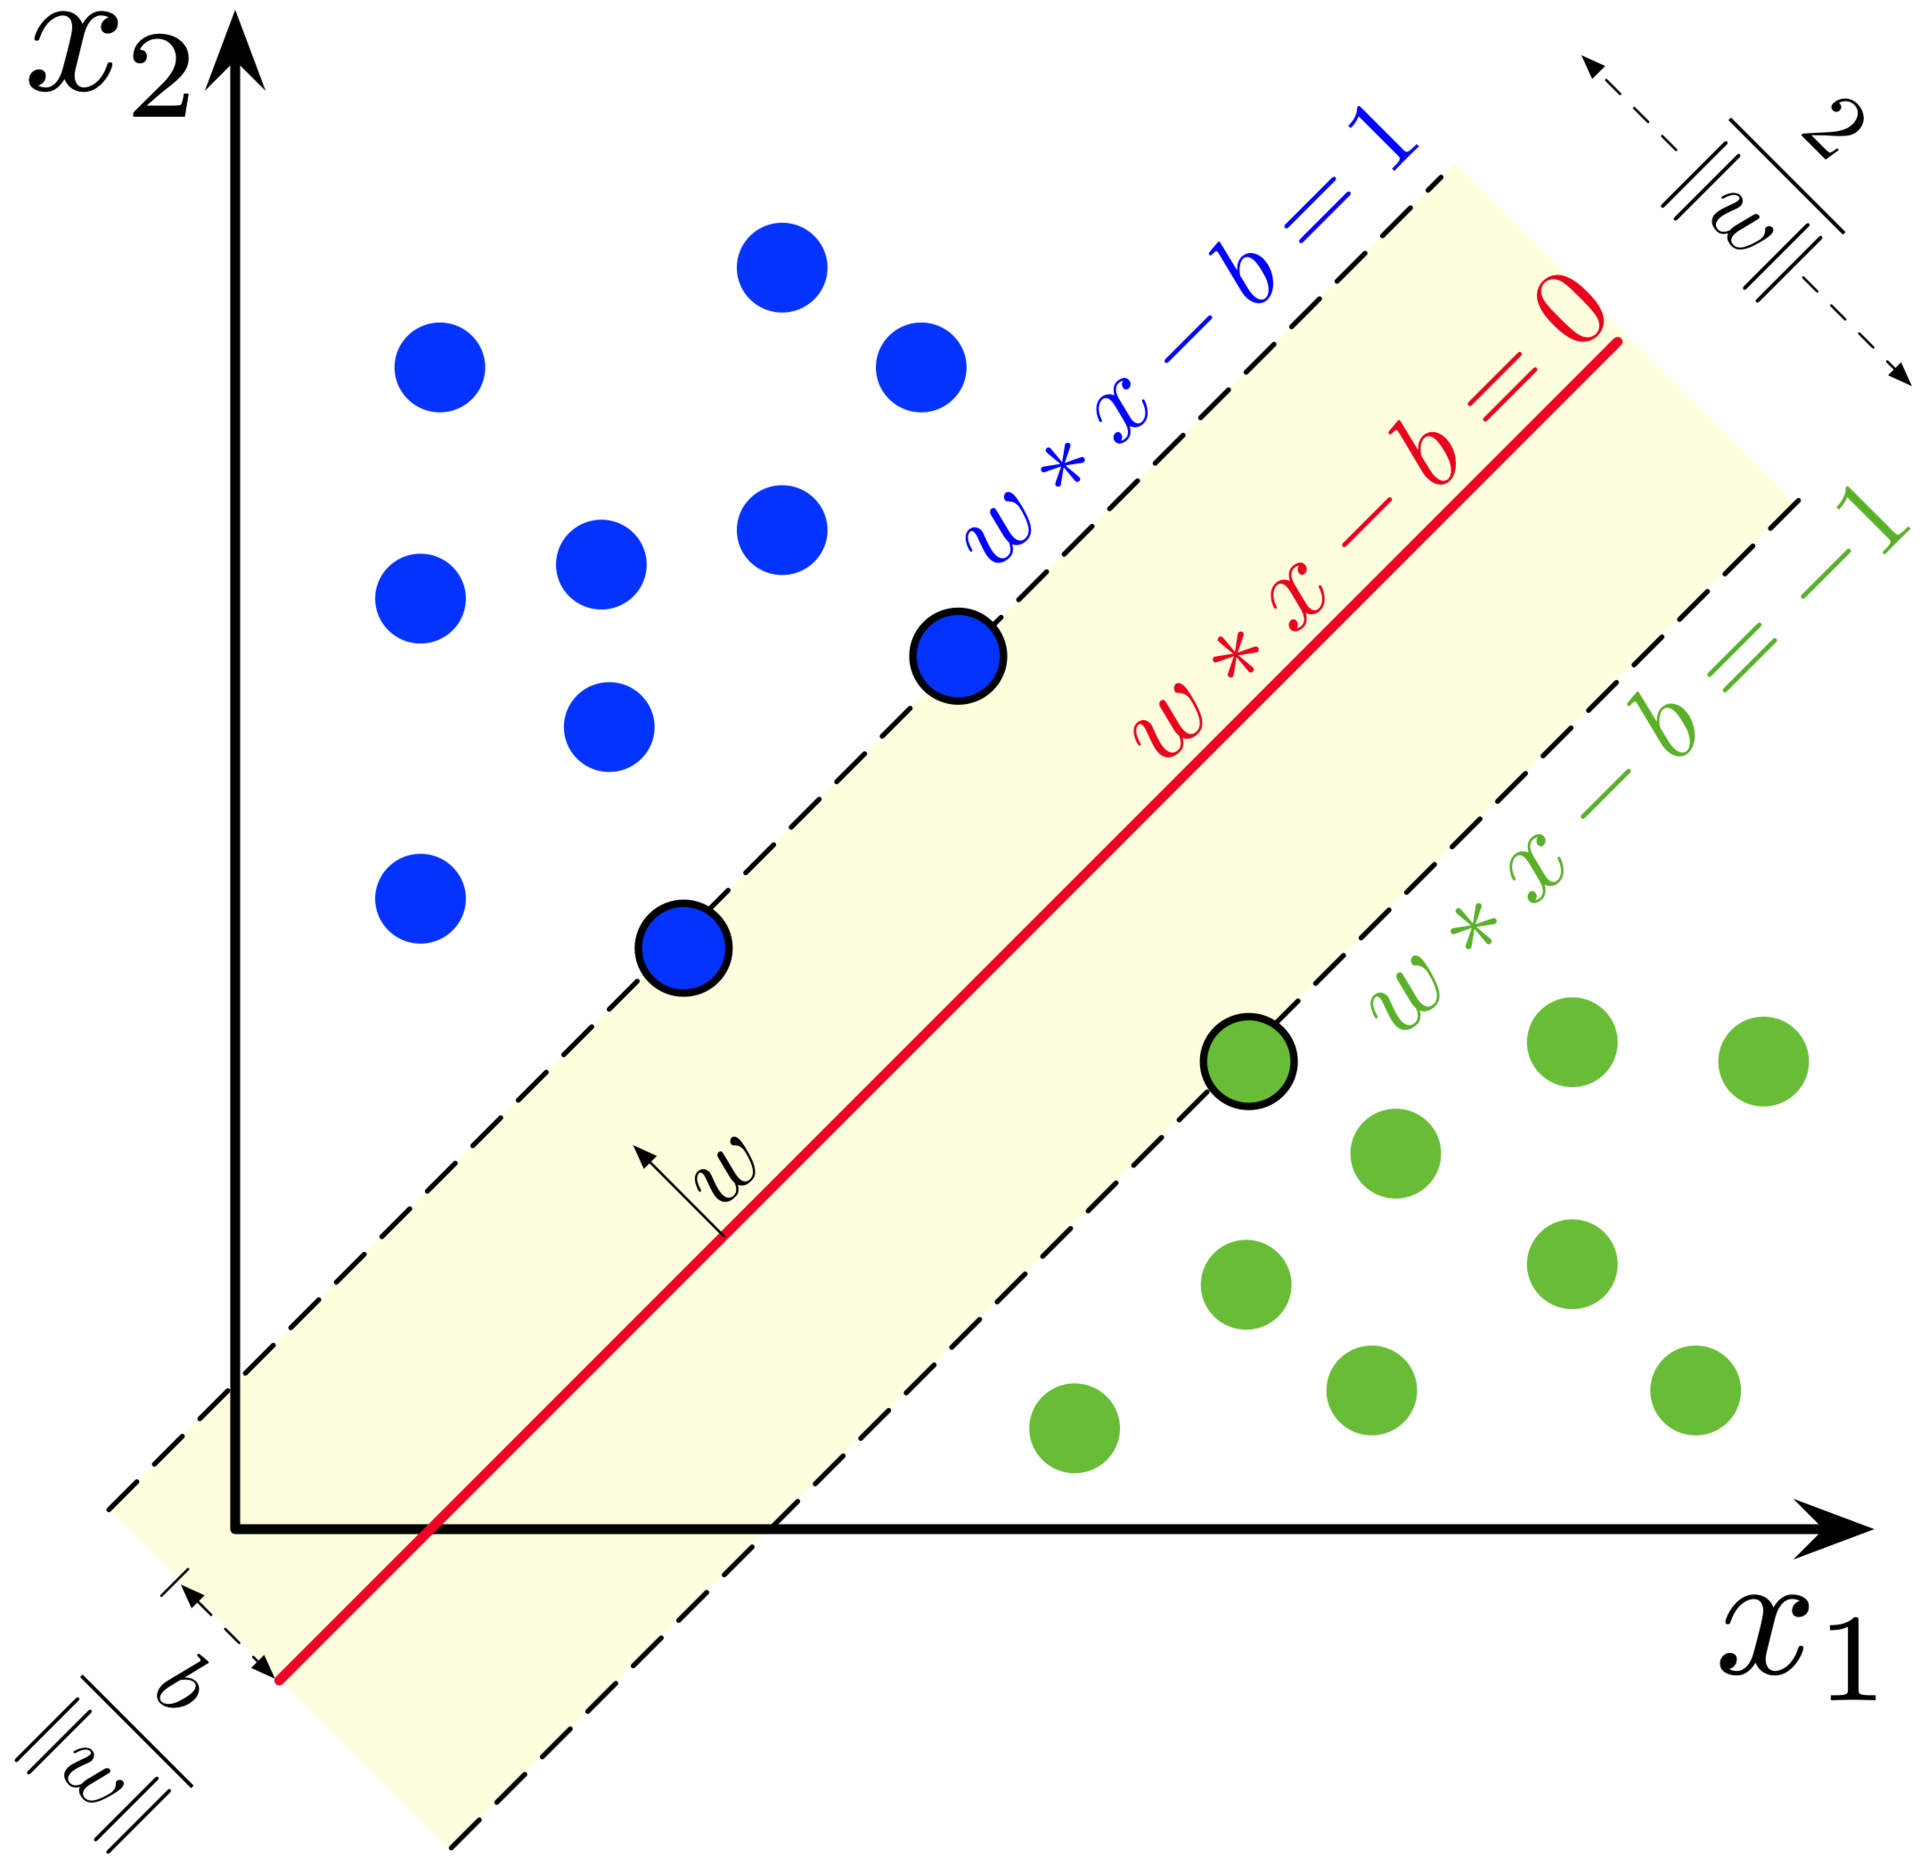
</div>


<br>
<br>

[[1](https://en.wikipedia.org/wiki/File:SVM_margin.png)]



## Linear SVM

We are given a training dataset of $n$ points of the form

$$ (\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n) $$

where the $y_i$ are either $1$ or $−1$, each indicating the class to which the point $\vec{x}_i$ belongs. Each $\vec{x}_i$ is a $p$-dimensional real number vector. We want to find the "maximum-margin hyperplane" that divides the group of points $\vec{x}_i$ for which $y_i = 1$ from the group of points for which $y_i = -1$, which is defined so that the distance between the hyperplane and the nearest point $\vec{x}_i$ from either group is maximized.

Any hyperplane can be written as the set of points $\vec{x}$ satisfying

$$\vec{w} \cdot \vec{x} - b = 0$$

where $\vec{w}$ is the (not necessarily normalized) normal vector to the hyperplane. The parameter $\tfrac{b}{\|\vec{w}\|}$ determines the offset of the hyperplane from the origin along the normal vector $\vec{w}$.

### Hard-margin

If the training data is *linearly separable*, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations
<br>
<br>
$\vec{w} \cdot \vec{x} - b = 1$  (anything on or above this boundary is of one class, with label 1)
<br>
<br>
and
<br>
<br>
$\vec{w} \cdot \vec{x} - b = -1$ (anything on or below this boundary is of the other class, with label −1).

Geometrically, the distance between these two hyperplanes is $\tfrac{2}{\|\vec{w}\|}$, so to maximize the distance between the planes we want to minimize $\|\vec{w}\|$. The distance is computed using the *distance from a point to a plane* equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each $i$ either
<br>
<br>
$ \vec{w} \cdot \vec{x}_i - b \ge 1$, if $y_i = 1$,
<br>
<br>
or
<br>
<br>
$\vec{w} \cdot \vec{x}_i - b \le -1$, if $y_i = -1$.
<br>
<br>
These constraints state that each data point must lie on the correct side of the margin.
<br>
<br>
<br>
This can be rewritten as
$$y_i(\vec{w} \cdot \vec{x}_i - b) \ge 1, \quad \text{ for all } 1 \le i \le n.\qquad\qquad(1) $$
<br>
<br>
We can put this together to get the optimization problem:
<br>
<br>
**Minimize $\|\vec{w}\|$ subject to $y_i(\vec{w} \cdot \vec{x}_i - b) \ge 1$ for $i = 1, \ldots, n$.**

The $\vec w$ and $b$ that solve this problem determine our classifier, $\vec{x} \mapsto sgn(\vec{w} \cdot \vec{x} - b)$.

An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those $\vec{x}_i$ that lie nearest to it. These $\vec{x}_i$ are called *support vectors*. This is a quadratic optimisation problem subject to linear constraints, and there is no unique minimum, therefore it is better to have a soft margin.

### Soft-margin
To extend SVM to cases in which the data are not linearly separable, we introduce the *hinge loss* function,

$$\max\left(0, 1 - y_i(\vec{w} \cdot \vec{x}_i - b)\right) $$

Note that $y_i$ is the $i$-th target (i.e., in this case, $1$ or $−1$), and $\vec{w} \cdot \vec{x}_i - b$ is the current output.

This function is zero if the constraint in $(1)$ is satisfied, in other words, if $\vec{x}_i$ lies on the correct side of the margin. For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.

We then wish to minimize

$$ \left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\vec{w} \cdot \vec{x}_i - b)\right) \right] + \lambda\lVert \vec{w} \rVert^2 $$

where the parameter $\lambda$ determines the trade-off between increasing the margin size and ensuring that the $\vec{x}_i$ lie on the correct side of the margin. Thus, for sufficiently small values of $\lambda$, the second term in the loss function will become negligible, hence, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not.

### Computing the SVM classifier

Computing the (soft-margin) SVM classifier amounts to minimizing an expression of the form

$$ \left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(w\cdot x_i - b)\right) \right] + \lambda\lVert w \rVert^2. \qquad(2)$$ 

We focus on the soft-margin classifier since, as noted above, choosing a sufficiently small value for $\lambda$ yields the hard-margin classifier for linearly classifiable input data. The classical approach, which involves reducing (2) to a quadratic programming problem, is detailed below.

#### Primal
Minimizing (2) can be rewritten as a constrained optimization problem with a differentiable objective function in the following way.

For each $i \in \{1,\,\ldots,\,n\}$ we introduce a variable $\zeta_i = \max\left(0, 1 - y_i(w\cdot x_i - b)\right)$. Note that $\zeta_i$ is the smallest nonnegative number satisfying $y_i(w\cdot x_i - b) \geq 1- \zeta_i.$

Thus we can rewrite the optimization problem as follows

$$ \text{minimize } \frac 1 n \sum_{i=1}^n \zeta_i + \lambda\|w\|^2 $$
$$ \text{subject to } y_i(w \cdot x_i - b) \geq 1 - \zeta_i \,\text{ and }\,\zeta_i \geq 0,\,\text{for all }i. $$

This is called the *primal* problem.

#### Dual
By solving for the *Lagrangian dual* of the above problem, one obtains the simplified problem

$$ \text{maximize}\,\, f(c_1 \ldots c_n) =  \sum_{i=1}^n c_i - \frac 1 2 \sum_{i=1}^n\sum_{j=1}^n y_ic_i(x_i \cdot x_j)y_jc_j,$$ 
$$ \text{subject to } \sum_{i=1}^n c_iy_i = 0,\,\text{and } 0 \leq c_i \leq \frac{1}{2n\lambda}\;\text{for all }i. $$

This is called the *dual* problem. Since the dual maximization problem is a quadratic function of the $ c_i$ subject to linear constraints, it is efficiently solvable by quadratic programming algorithms.

Here, the variables $c_i$ are defined such that

$$ \vec w = \sum_{i=1}^n c_iy_i \vec x_i $$

Moreover, $c_i = 0$ exactly when $ \vec x_i$ lies on the correct side of the margin, and $ 0 < c_i <(2n\lambda)^{-1}$  when $ \vec x_i$ lies on the margin's boundary. It follows that $ \vec w$ can be written as a linear combination of the support vectors.

The offset, $b$, can be recovered by finding an $\vec x_i$ on the margin's boundary and solving

$$ y_i(\vec w \cdot \vec x_i - b) = 1 \iff b = \vec w \cdot \vec x_i - y_i .$$ 

(Note that $y_i^{-1}=y_i$ since $y_i=\pm 1$.)

[]

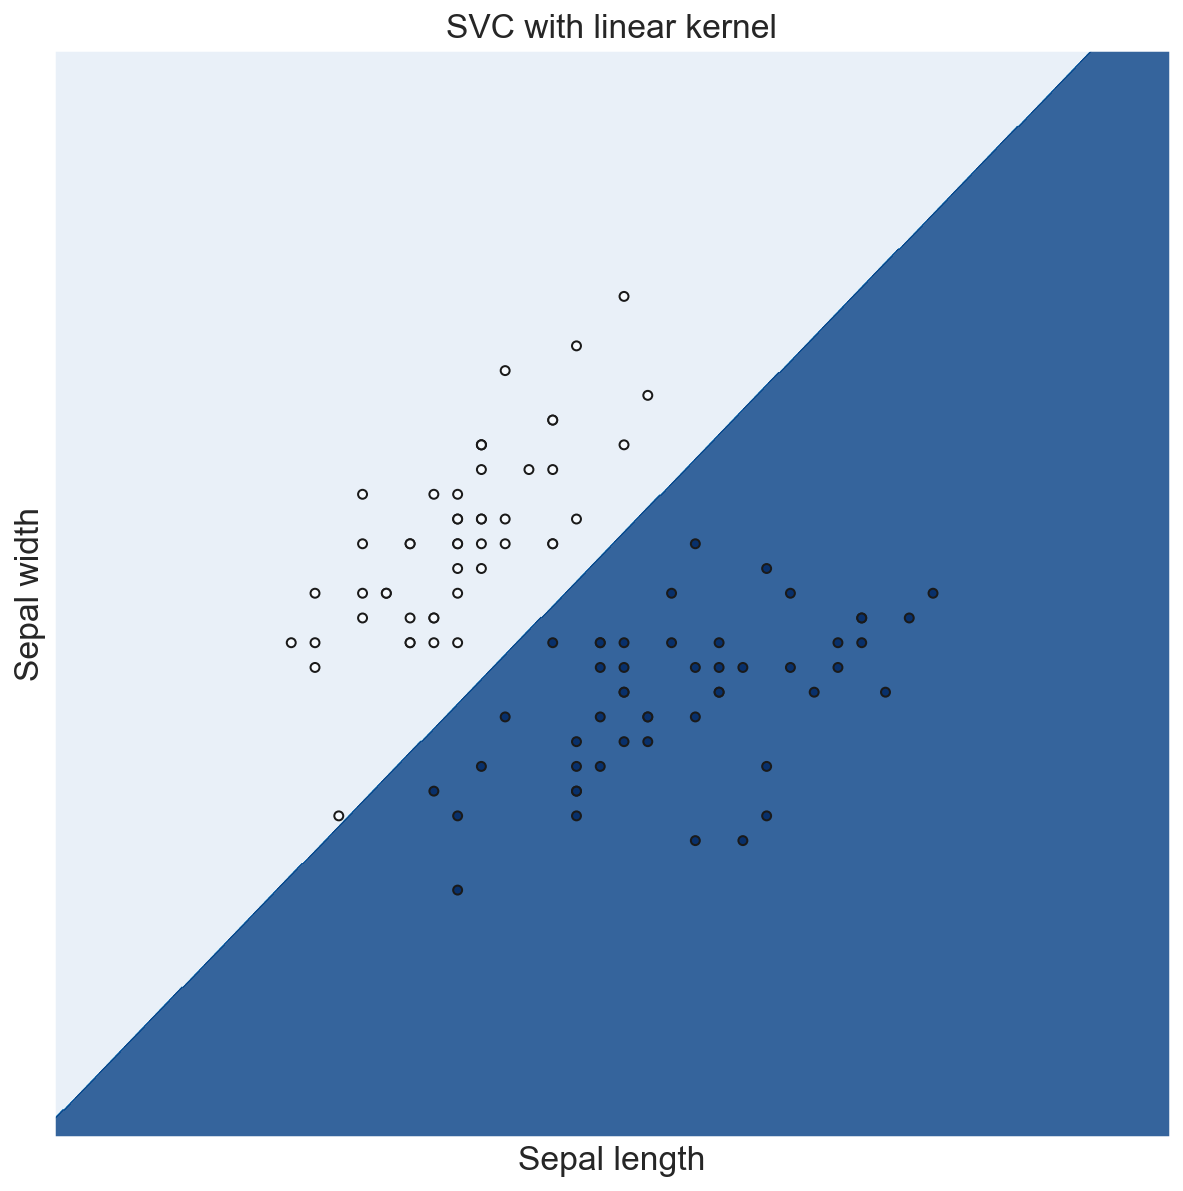

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
# Simplify dataset to two classes & two features
X_list = []
y_list = []
for X_i, y_i in zip(X, y):
    if y_i <= 1:
        X_list.append(X_i)
        y_list.append(y_i)
X = np.array(X_list)[:, :2]
y = np.array(y_list)

C = 1.0  # SVM regularization parameter
clf = SVC(kernel='linear', C=C)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
cmap = plt.cm.Blues

fig, ax = plt.subplots(figsize=(10,10))
plot_contours(ax, clf, xx, yy, cmap=cmap, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')
ax.plot()

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members `support_vectors_`, `support_` and `n_support`:

In [4]:
print('Support vectors : {}'.format(clf.support_))
print('Indicies of support vectors : {}'.format(clf.support_))
print('Number of support vectors for each class : {}'.format(clf.n_support_))

Support vectors : [ 1 18 20 25 31 36 41 45 57 59 66 70 84 85 88 98]
Indicies of support vectors : [ 1 18 20 25 31 36 41 45 57 59 66 70 84 85 88 98]
Number of support vectors for each class : [8 8]


### SVC Variants

Regularisation parameter $C \propto \frac{1}{\lambda}$. $C$ is common to all SVM models and trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth, while a high $C$ aims at classifying all training examples correctly.

#### SVC

Vanilla soft margin Support Vector Machine Classifier (SVC) as seen above. Uses the *libsvm* library. Training time is at scales at least $O(m^2)$ where $m$=samples. Use `LinearSVC` or `SGDClassifier` for large datasets. Supports multiclass with "one-vs-one" scheme.

#### NuSVC

SVC with an additional parameter $\nu \in (0,1]$ which is an upper bound on the fraction of training errors and a lower bound on the fraction of support vectors.

#### LinearSVC

A linear only Support Vector Machine Classifier that uses the *liblinear* library. Training time scales as $O(m)$, supports penalties$\in \{l1,l2\}$ and loss $\in \{hinge, squared\_hinge\}$. Supports multiclass with "one-vs-the-rest" scheme.

## Scaling data

SVMs are not scale invariant, therefore it is always best pratice to normalise the input features for each sample. I.e. standardise it to have a mean of 0 and variance of 1. Can be done with a data pipeline like so :

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

SVC_scaled_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='linear', C=C))
    ])
SVC_scaled_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Multi-class classification

`SVC` and `NuSVC` implement the “one-against-one” approach for multi- class classification. If $n_{class}$ is the number of classes, then $$\frac{n_{class} (n_{class} - 1)}{2}$$ classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to monotically transform the results of the “one-against-one” classifiers to a decision function of shape $(n_{samples}, n_{classes})$.

On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained.


Training accuracy: 82.0%


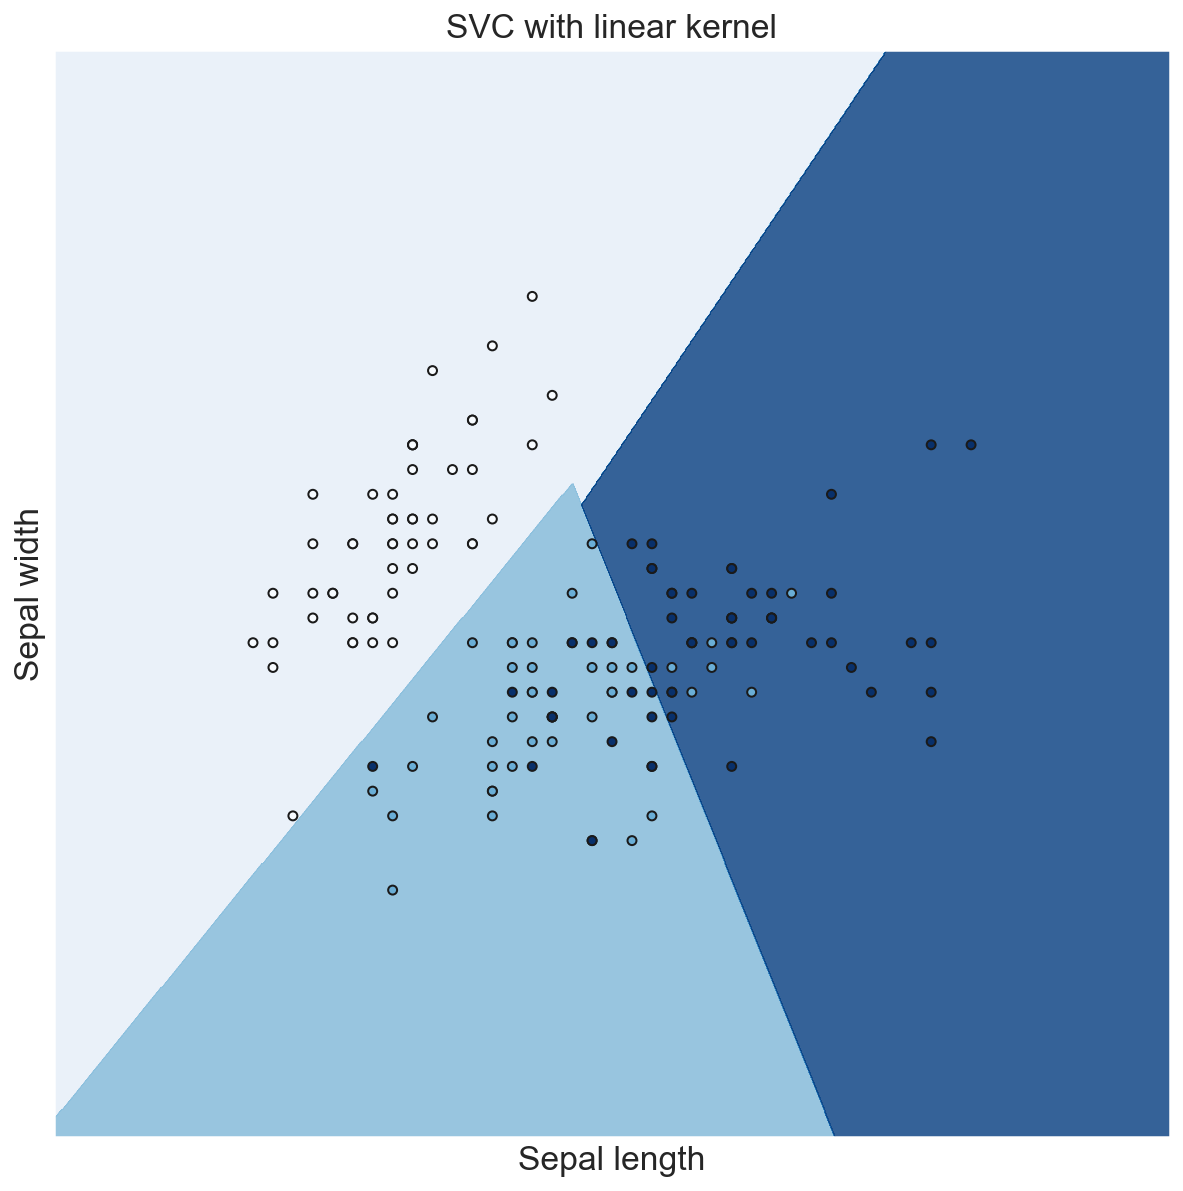

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

X, y = load_iris(return_X_y=True)
X = X[:, :2]

C = 1.0  # SVM regularization parameter
clf = SVC(kernel='linear', C=C)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
cmap = plt.cm.Blues

fig, ax = plt.subplots(figsize=(10,10))
plot_contours(ax, clf, xx, yy, cmap=cmap, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')
ax.plot()

print('Training accuracy: {}%'.format(accuracy_score(y, clf.predict(X))*100))

### Support Vector Machine Classifier with Kernels

We can create non-linear classifiers using the *kernel trick*, by replacing every dot product of the feature vectors in the above equations with a nonlinear kernel function. This allows fitting of the maximum-margin hyperplane in a transformed feature space.

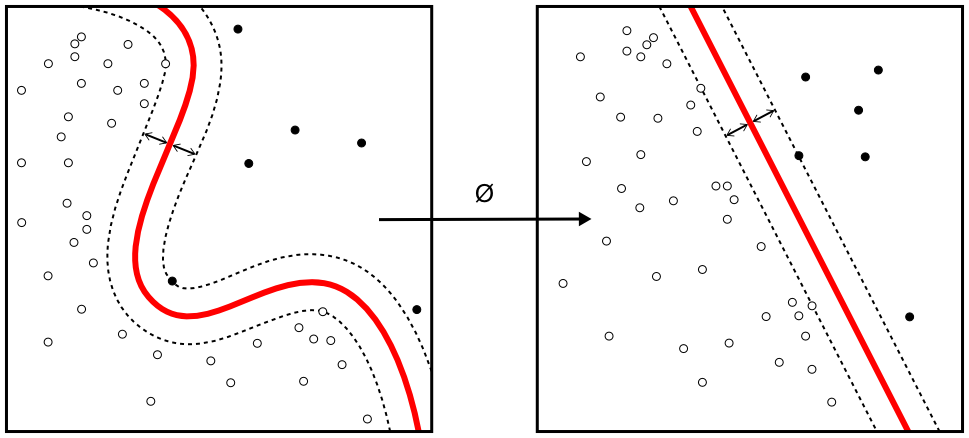
[[2](https://en.wikipedia.org/wiki/File:Kernel_Machine.png)]


The kernel function can be any of 

|**kernel function**|**equation**|**description**|
|---|---|---|
|`linear`|$$\langle x, x'\rangle$$||
|`polynomial`|$(\gamma \langle x, x'\rangle + r)^d$|$d$ is specified by keyword `degree`, $r$ by `coef0`|
|`radial basis function`|$\exp(-\gamma \|x-x'\|^2)$|$\gamma$ is specified by keyword `gamma`, which must be greater than $0$|
|`sigmoid`|$\tanh(\gamma \langle x,x'\rangle + r)$|$r$ is specified by `coef0`|

In pratice we can use `polynomial` kernels to create more features of various polynomial degrees. However we have to be careful that we are not creating a too verbose model with a high degree that would overfit, and vice versa for underfitting.

Training accuracy: 81.33333333333333%


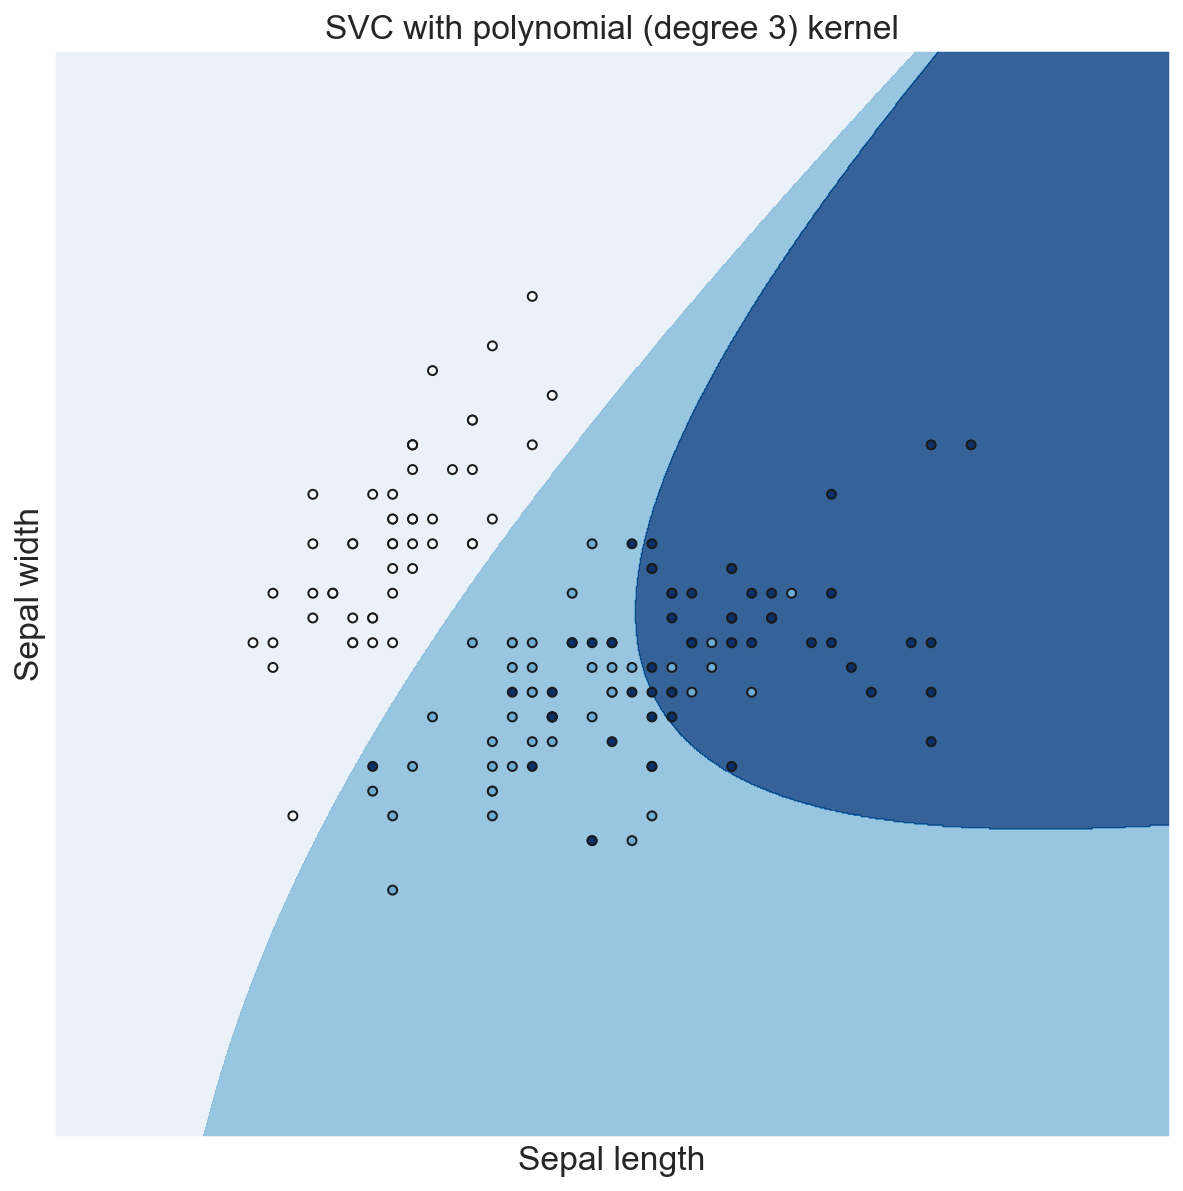

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X = X[:, :2]

C = 1.0  # SVM regularization parameter
clf = SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
cmap = plt.cm.Blues

fig, ax = plt.subplots(figsize=(10,10))
plot_contours(ax, clf, xx, yy, cmap=cmap, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with polynomial (degree 3) kernel')
ax.plot()

print('Training accuracy: {}%'.format(accuracy_score(y, clf.predict(X))*100))

In pratice gaussian `radial basis function` kernels appear to be widedly used. These add features computed using a *similiarity metric*. The RBF equation above shows a guassian like function that varies from 0 far away to 1 at the same point under evaluation. The similarity is computed for each sample point, transforming the dataset into one from $m$ samples and $n$ features to one with $m$ samples and $m$ features. This of course increases the chances that the data is lineary seperable in these many dimensions.

RBF's hyper parameter $\gamma$, when increased makes the kernel function tigther, thus each sample instance range of influence smaller, and vice versa. If the model is overfitting $\gamma$ can be reduced, acting like a regularisation parameter.


Training accuracy: 83.33333333333334%


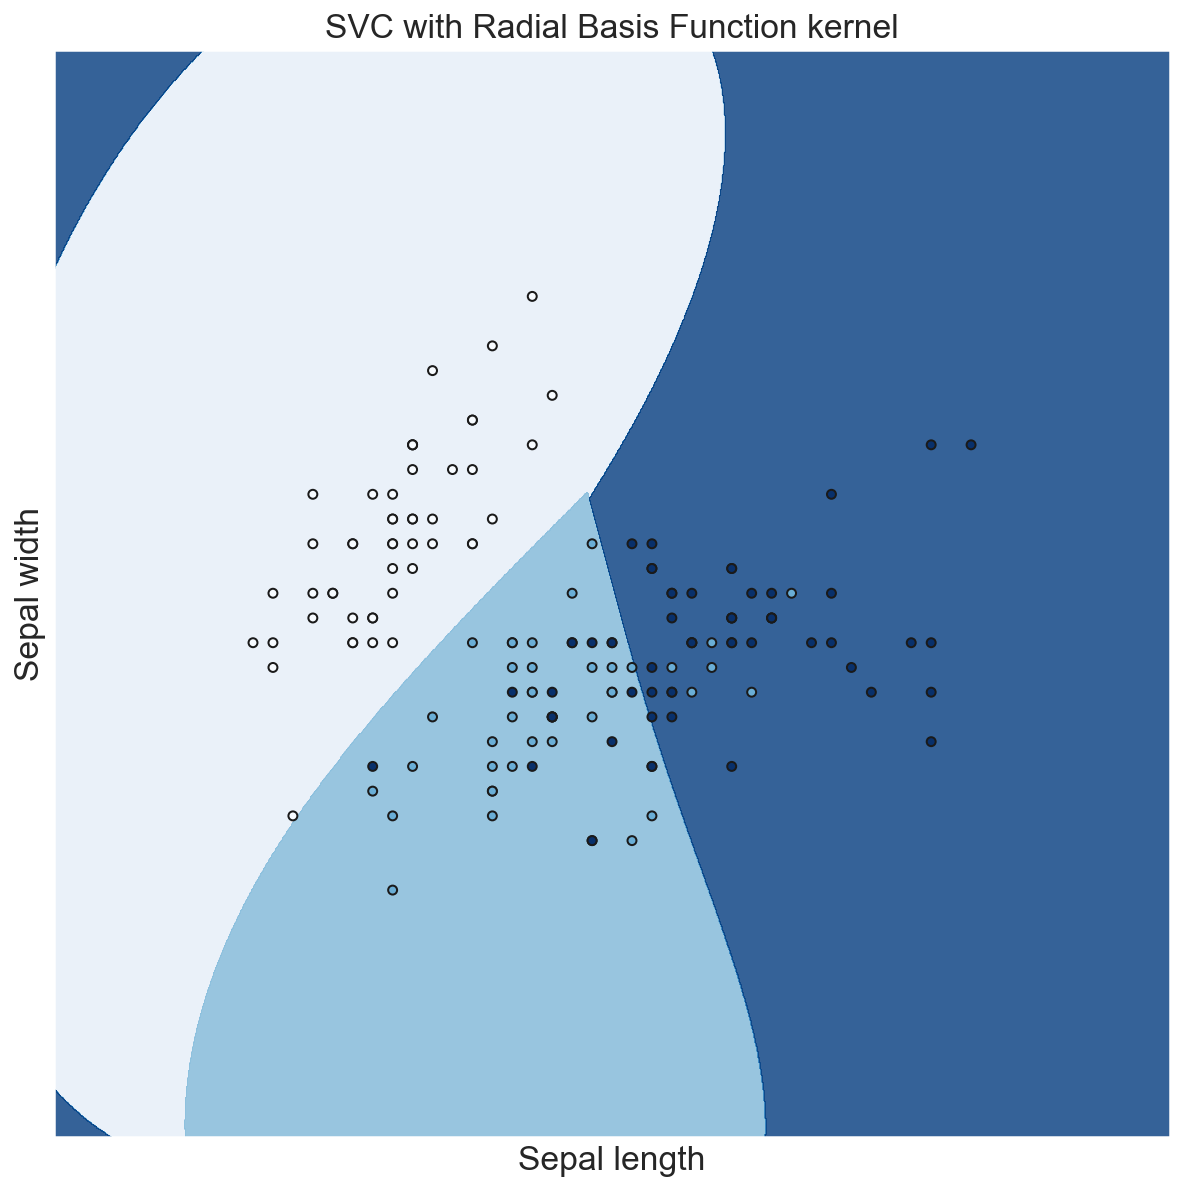

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X = X[:, :2]

C = 1.0  # SVM regularization parameter
clf = SVC(kernel='rbf', gamma=0.6, C=C)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
cmap = plt.cm.Blues

fig, ax = plt.subplots(figsize=(10,10))
plot_contours(ax, clf, xx, yy, cmap=cmap, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with Radial Basis Function kernel')
ax.plot()

print('Training accuracy: {}%'.format(accuracy_score(y, clf.predict(X))*100))

## Support Vector Regression

The model produced by support-vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by SVR depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

Training the original SVR means solving
<br>
<br>
minimise $\frac{1}{2} \|w\|^2$
<br>
<br>
subject to $| y_i - \langle w, x_i \rangle  - b | \le \varepsilon$
<br>
<br>
where $x_{i}$ is a training sample with target value $y_{i}$. The inner product plus intercept $\langle w,x_{i}\rangle +b$ is the prediction for that sample, and $\varepsilon$  is a free parameter that serves as a threshold: all predictions have to be within an $\varepsilon$  range of the true predictions. Slack variables are usually added into the above to allow for errors and to allow approximation in the case the above problem is infeasible.

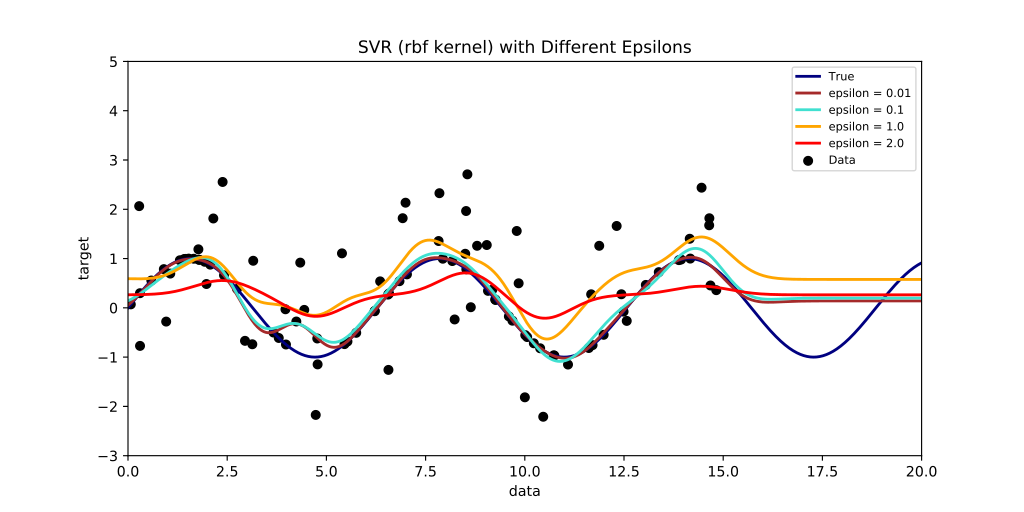

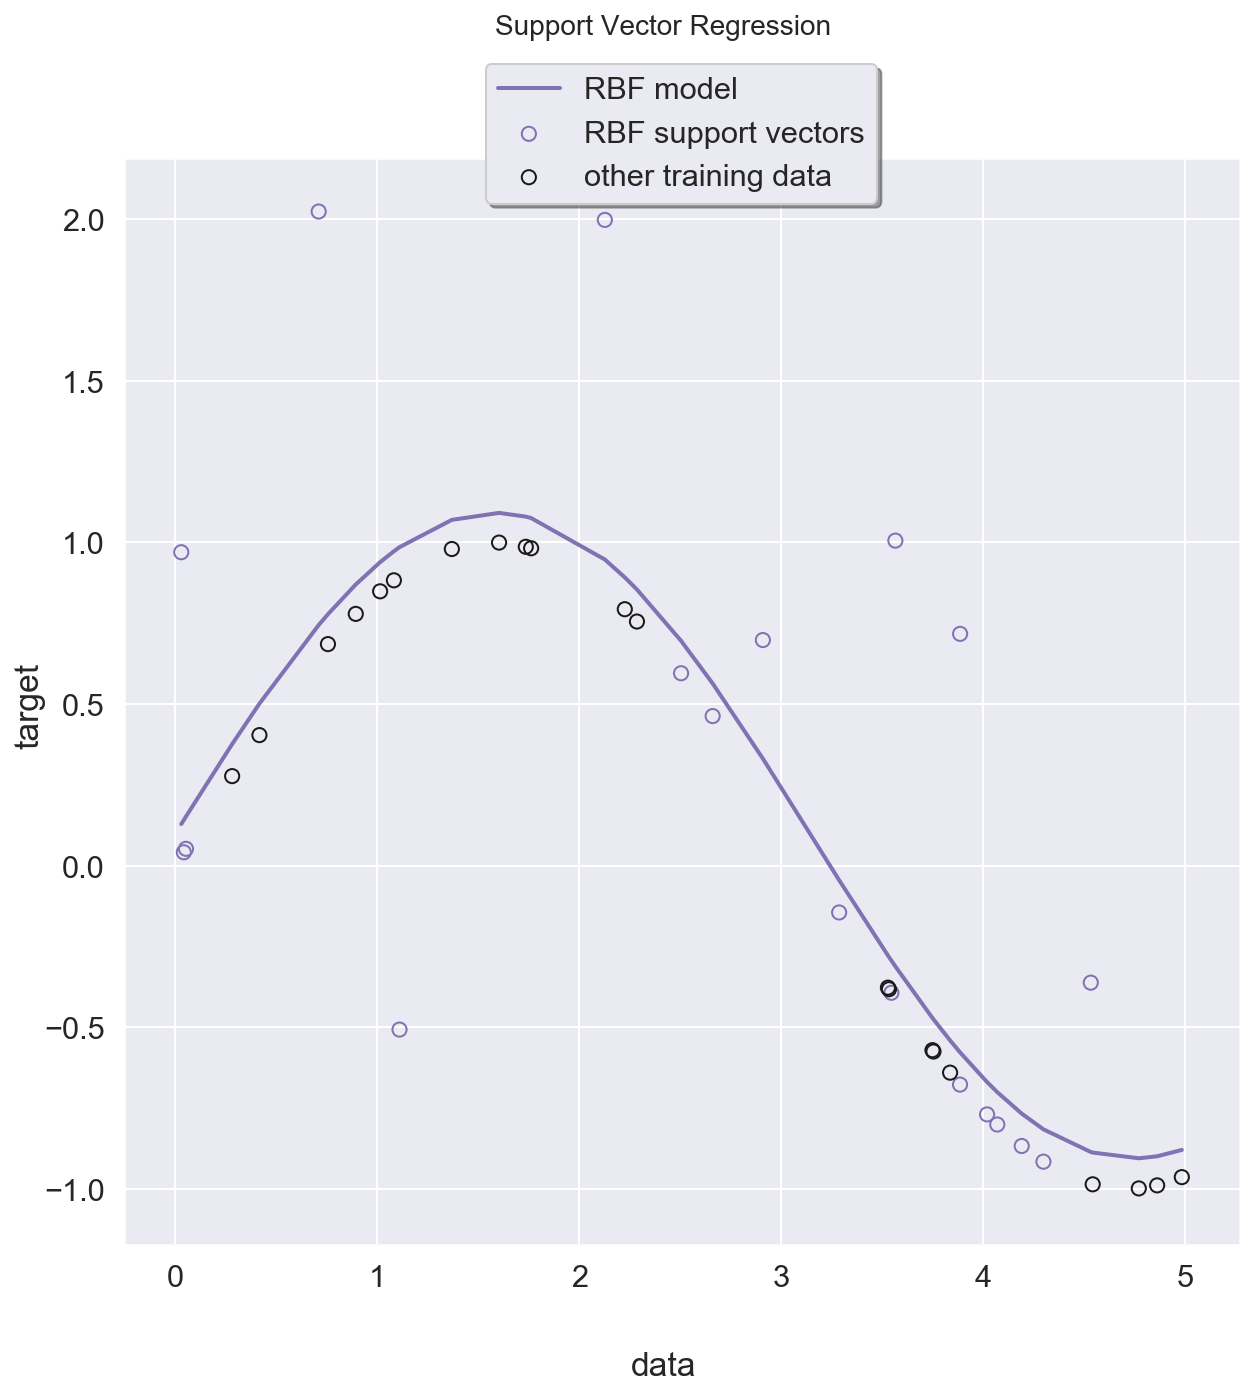

In [9]:
from sklearn.svm import SVR

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Look at the results
lw = 2

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X, svr.fit(X, y).predict(X), color='m', lw=lw,
              label='RBF model')
ax.scatter(X[svr.support_], y[svr.support_], facecolor="none",
                 edgecolor='m', s=50,
                 label='RBF support vectors')
ax.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                 y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                 facecolor="none", edgecolor="k", s=50,
                 label='other training data')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

[[3](https://scikit-learn.org/stable/modules/svm.html)]